# Aggregation and Visualization

We briefly introduced [Pandas](https://pandas.pydata.org/) from [Basics Part 03](../basics/03-data-containers-and-repetitions-3.md) as a library that provides robust implementations for typical data analysis tasks.

[Project Jupyter](https://jupyter.org/) is an open-source project (Jupyter Notebook is one of its components) to provide an accessible and interactive environment for data analysis. While our focus is to utilize Python through Jupyter, it is worth mentioning that it is theoretically language-agnostic. Besides Python, it officially supports the [Julia](https://julialang.org/) and the [R](https://www.r-project.org/) languages, which are also popular in the data analysis space.

We will utilize the Jupyter Notebook as an interactive platform and powerful libraries such as Pandas to explore practical data analytical techniques.

## Aggregation

To make statistical sense of data, we can perform aggregations on selected groups from the source data to give us different vantage points for data analysis. More often than not, they are also necessary to reduce or eliminate data resolution on personal information to protect privacy.

We will use the [last exercise problem](../basics/03-data-containers-and-repetitions-3.md#problem-03---by-province) to demonstrate data aggregation tasks.

In [1]:
import pandas as pd

# import source data
df = pd.read_json('../data/poi_stats.json')
df

,poi,address,city,province,postalcode,visitors,visits,revenue,cost
0,"Chang, Mccoy and Bond",99480 Joanna Radial,Robertmouth,NS,B3R5Y9,498,659,5342.720445,1295.402883
1,"Rodgers, Sanders and Rojas",81096 Morris Trail,Port Jacob,SK,S8G6S6,242,320,1745.275087,1671.142039
2,Ayers-Clark,68282 Silva Cape,Port Jacobburgh,NB,E8K2K1,1863,2468,148.487100,75.779441
3,Warren Inc,12053 Jonathan Common,Smithmouth,ON,K5C 2V4,1756,2326,10109.082892,3051.138283
4,Patterson-Gregory,73489 Rachel Summit,Nashfurt,QC,J3V9G8,1664,3328,16966.325835,14125.538706
...,...,...,...,...,...,...,...,...,...
4995,"Nelson, Gay and Ramirez",746 Wagner Fall,Lloydville,SK,S5X4S9,1788,2369,13176.733667,5790.082467
4996,Fuller-Mccann,271 Hahn Mews Apt. 956,Hinesshire,NL,A2Y2B7,266,352,493.365287,467.295658
4997,"Lewis, Arnold and Gonzalez",355 Mays Glens Apt. 466,West Christopherberg,QC,G2S 1L7,1898,7592,6623.274467,2250.247387
4998,"Koch, Henry and Coffey",45711 Renee Brooks,Marthaport,SK,S3A4K9,129,170,1397.275389,848.284537


In [2]:
# enrich with derived stats
df['profit'] = df['revenue'] - df['cost']
df['profit_margin'] = df['profit'] / df['revenue']
df['avg_revenue'] = df['revenue'] / df['visitors']
df['avg_visits'] = df['visits'] / df['visitors']
df

,poi,address,city,province,postalcode,visitors,visits,revenue,cost,profit,profit_margin,avg_revenue,avg_visits
0,"Chang, Mccoy and Bond",99480 Joanna Radial,Robertmouth,NS,B3R5Y9,498,659,5342.720445,1295.402883,4047.317562,0.757539,10.728354,1.323293
1,"Rodgers, Sanders and Rojas",81096 Morris Trail,Port Jacob,SK,S8G6S6,242,320,1745.275087,1671.142039,74.133048,0.042476,7.211881,1.322314
2,Ayers-Clark,68282 Silva Cape,Port Jacobburgh,NB,E8K2K1,1863,2468,148.487100,75.779441,72.707659,0.489656,0.079703,1.324745
3,Warren Inc,12053 Jonathan Common,Smithmouth,ON,K5C 2V4,1756,2326,10109.082892,3051.138283,7057.944609,0.698179,5.756881,1.324601
4,Patterson-Gregory,73489 Rachel Summit,Nashfurt,QC,J3V9G8,1664,3328,16966.325835,14125.538706,2840.787129,0.167437,10.196109,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,"Nelson, Gay and Ramirez",746 Wagner Fall,Lloydville,SK,S5X4S9,1788,2369,13176.733667,5790.082467,7386.651200,0.560583,7.369538,1.324944
4996,Fuller-Mccann,271 Hahn Mews Apt. 956,Hinesshire,NL,A2Y2B7,266,352,493.365287,467.295658,26.069628,0.052840,1.854757,1.323308
4997,"Lewis, Arnold and Gonzalez",355 Mays Glens Apt. 466,West Christopherberg,QC,G2S 1L7,1898,7592,6623.274467,2250.247387,4373.027080,0.660252,3.489607,4.000000
4998,"Koch, Henry and Coffey",45711 Renee Brooks,Marthaport,SK,S3A4K9,129,170,1397.275389,848.284537,548.990852,0.392901,10.831592,1.317829


In [3]:
# multi-aggregations on multiple stats, group by province
stats = ['visits', 'revenue', 'cost', 'profit']
aggs = ['sum', 'mean', 'median', 'std']
gb = df.groupby('province', as_index=False)
gb = gb.agg({k: aggs for k in stats})
# set index on province
gb = gb.set_index('province')
gb

visits                                         revenue               \
             sum         mean  median          std           sum         mean   
province                                                                        
AB        598887  1631.844687  1507.0  1207.924624  1.957338e+06  5333.346035   
BC        638877  1605.218593  1349.5  1220.766867  1.978580e+06  4971.307592   
MB        586669  1598.553134  1388.0  1289.954681  1.875169e+06  5109.451903   
NB        608273  1635.142473  1432.0  1125.316326  2.059007e+06  5534.963909   
NL        646743  1637.324051  1563.0  1222.851777  2.118423e+06  5363.095977   
NS        637595  1622.379135  1454.0  1251.795464  2.034452e+06  5176.723195   
NT        577830  1618.571429  1477.0  1183.248318  1.908705e+06  5346.512033   
NU        631057  1647.668407  1454.0  1265.791674  1.935582e+06  5053.737706   
ON        661184  1632.553086  1498.0  1173.847872  2.149993e+06  5308.624342   
PE        660446  1630.730864  1396.0  1325.468893  2.006592e+06  4954.547357   
QC        537624  1544.896552  1366.0  1211.517992  1.684283e+06  4839.894194   
SK        655643  1610.916462  1448.0  1174.426252  2.185932e+06  5370.841220   
YT        645777  1602.424318  1389.0  1225.845080  2.105802e+06  5225.316257   

                                            cost                            \
               median          std           sum         mean       median   
province                                                                     
AB        4240.786885  4575.746075  9.306789e+05  2535.909808  1363.191856   
BC        3840.176558  4383.045994  9.759790e+05  2452.208478  1317.756975   
MB        3500.783437  4869.189279  9.387314e+05  2557.851189  1242.009650   
NB        4704.699840  4666.649750  1.025301e+06  2756.184228  1484.138490   
NL        4183.457084  4513.396566  1.054429e+06  2669.441431  1771.708651   
NS        4084.766670  4255.548586  1.091075e+06  2776.271952  1584.701419   
NT        3952.312413  4808.481481  9.485218e+05  2656.923909  1401.889823   
NU        4126.094846  4306.769286  9.907835e+05  2586.901996  1516.442627   
ON        3760.222810  4878.020826  1.092615e+06  2697.815112  1335.065658   
PE        3683.882085  4559.807838  1.027810e+06  2537.802731  1324.689409   
QC        3455.277853  4514.588636  8.889656e+05  2554.498868  1448.474889   
SK        4231.672221  4650.642431  1.077849e+06  2648.278295  1447.285499   
YT        4386.255527  4496.615467  1.007034e+06  2498.843160  1423.904029   

                             profit                                         
                  std           sum         mean       median          std  
province                                                                    
AB        3028.755904  1.026659e+06  2797.436228  1674.619488  3048.389185  
BC        2987.269444  1.002601e+06  2519.099114  1456.642595  2819.653830  
MB        3316.648170  9.364375e+05  2551.600714  1281.294747  3065.539736  
NB        3154.782050  1.033706e+06  2778.779681  1363.497169  3270.187080  
NL        3051.517494  1.063994e+06  2693.654546  1599.519855  3051.180801  
NS        3082.575390  9.433773e+05  2400.451242  1457.965681  2714.220441  
NT        3272.370798  9.601830e+05  2689.588124  1433.618029  3108.061236  
NU        2933.381676  9.447981e+05  2466.835710  1256.360359  2859.482765  
ON        3343.486180  1.057378e+06  2610.809230  1328.667381  3064.722853  
PE        3002.487237  9.787816e+05  2416.744625  1188.024142  3099.391700  
QC        3085.300928  7.953176e+05  2285.395326  1319.910856  2791.985530  
SK        3015.693389  1.108083e+06  2722.562925  1471.960960  3093.019724  
YT        2716.203010  1.098769e+06  2726.473097  1705.050113  3097.512796

In [4]:
# flatten headers
flat = gb.copy()

def flat_join(c):
    return '_'.join(c).strip('_')

flat.columns = flat.columns.to_flat_index().map(flat_join)
# equiv lambda
# flat.columns = flat.columns.to_flat_index().map(lambda c: '_'.join(c).strip('_'))
flat.reset_index()

,province,visits_sum,visits_mean,visits_median,visits_std,revenue_sum,revenue_mean,revenue_median,revenue_std,cost_sum,cost_mean,cost_median,cost_std,profit_sum,profit_mean,profit_median,profit_std
0,AB,598887,1631.844687,1507.0,1207.924624,1.957338e+06,5333.346035,4240.786885,4575.746075,9.306789e+05,2535.909808,1363.191856,3028.755904,1.026659e+06,2797.436228,1674.619488,3048.389185
1,BC,638877,1605.218593,1349.5,1220.766867,1.978580e+06,4971.307592,3840.176558,4383.045994,9.759790e+05,2452.208478,1317.756975,2987.269444,1.002601e+06,2519.099114,1456.642595,2819.653830
2,MB,586669,1598.553134,1388.0,1289.954681,1.875169e+06,5109.451903,3500.783437,4869.189279,9.387314e+05,2557.851189,1242.009650,3316.648170,9.364375e+05,2551.600714,1281.294747,3065.539736
3,NB,608273,1635.142473,1432.0,1125.316326,2.059007e+06,5534.963909,4704.699840,4666.649750,1.025301e+06,2756.184228,1484.138490,3154.782050,1.033706e+06,2778.779681,1363.497169,3270.187080
4,NL,646743,1637.324051,1563.0,1222.851777,2.118423e+06,5363.095977,4183.457084,4513.396566,1.054429e+06,2669.441431,1771.708651,3051.517494,1.063994e+06,2693.654546,1599.519855,3051.180801
5,NS,637595,1622.379135,1454.0,1251.795464,2.034452e+06,5176.723195,4084.766670,4255.548586,1.091075e+06,2776.271952,1584.701419,3082.575390,9.433773e+05,2400.451242,1457.965681,2714.220441
6,NT,577830,1618.571429,1477.0,1183.248318,1.908705e+06,5346.512033,3952.312413,4808.481481,9.485218e+05,2656.923909,1401.889823,3272.370798,9.601830e+05,2689.588124,1433.618029,3108.061236
7,NU,631057,1647.668407,1454.0,1265.791674,1.935582e+06,5053.737706,4126.094846,4306.769286,9.907835e+05,2586.901996,1516.442627,2933.381676,9.447981e+05,2466.835710,1256.360359,2859.482765
8,ON,661184,1632.553086,1498.0,1173.847872,2.149993e+06,5308.624342,3760.222810,4878.020826,1.092615e+06,2697.815112,1335.065658,3343.486180,1.057378e+06,2610.809230,1328.667381,3064.722853
9,PE,660446,1630.730864,1396.0,1325.468893,2.006592e+06,4954.547357,3683.882085,4559.807838,1.027810e+06,2537.802731,1324.689409,3002.487237,9.787816e+05,2416.744625,1188.024142,3099.391700


## Visualization

Data tables such as above are a form of data visualization. However, it can be daunting to pick up essential signals from it without more graphical ways.

[Seaborn](https://seaborn.pydata.org/) is such a Python library that provides a set of graphical charts for statistical data visualization.

In [5]:
import seaborn as sns

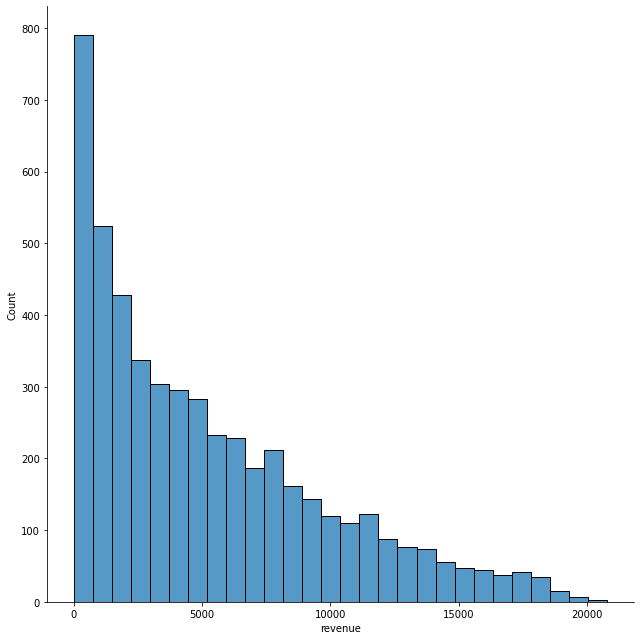

In [6]:
# visualize revenue distribution across the entire dataset
rev_dist = sns.displot(data=df, x='revenue', height=9)

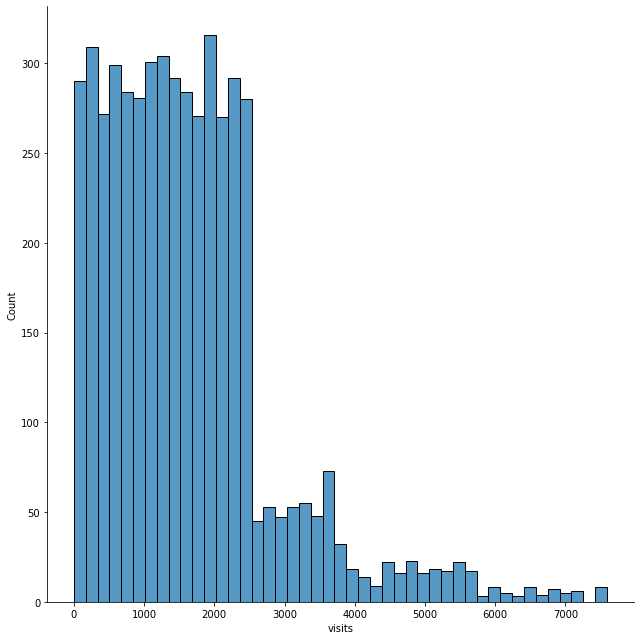

In [7]:
# visualize visits distribution across the entire dataset
vis_dist = sns.displot(data=df, x='visits', height=9)

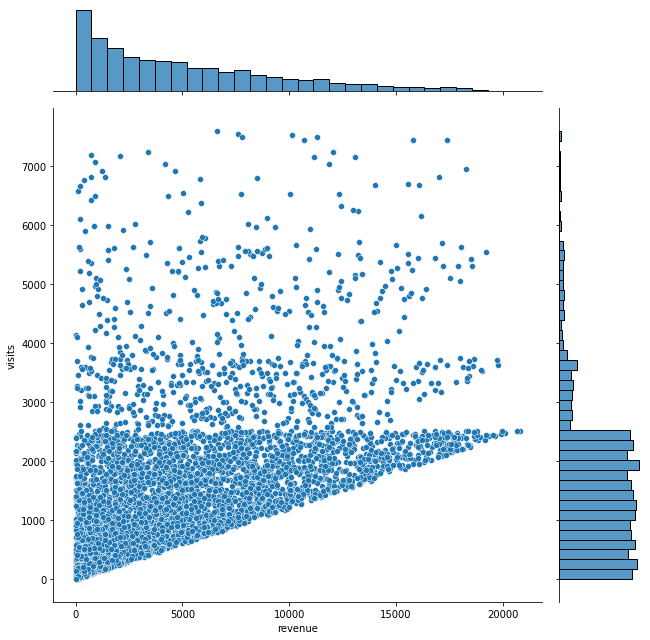

In [8]:
# visualize revenue vs. visits distribution across the entire dataset
vis_rev_joint = sns.jointplot(data=df, x='revenue', y='visits', height=9)

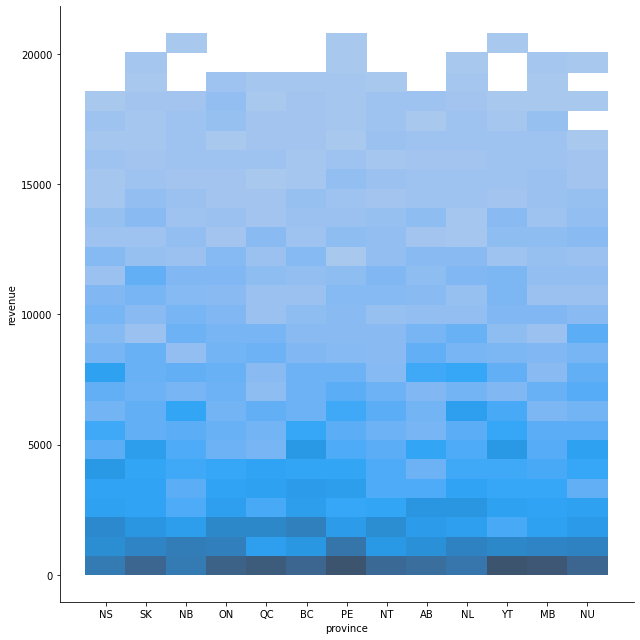

In [9]:
# visualize revenue distribution by province
vist_dist_by_province = sns.displot(data=df, x='province', y='revenue', height=9)

In [10]:
# extract only 'means' columns across provinces and the four metrics
mean_cols = gb.columns.map(lambda x: x[1] == 'mean')
mean_df = gb[gb.columns[mean_cols]]

# apply STD normalization
# normalized = (mean_df - mean_df.mean()) / mean_df.std()
# apply min-max normalization
normalized = (mean_df - mean_df.min()) / (mean_df.max() - mean_df.min())
normalized

,visits,revenue,cost,profit
,mean,mean,mean,mean
province,,,,
AB,0.846031,0.709931,0.258287,1.000000
BC,0.586951,0.189065,0.000000,0.456416
MB,0.522094,0.387814,0.325994,0.519891
NB,0.878119,1.000000,0.938013,0.963564
NL,0.899346,0.752733,0.670341,0.797318
NS,0.753928,0.484597,1.000000,0.224701
NT,0.716878,0.728873,0.631714,0.789376
NU,1.000000,0.307658,0.415639,0.354347


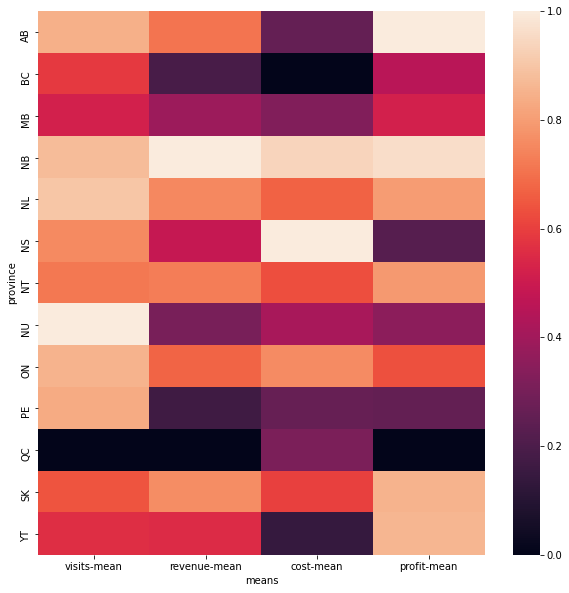

In [11]:
import matplotlib.pyplot as plot

_, ax = plot.subplots(figsize=(10, 10))
heatmap = sns.heatmap(normalized, ax=ax)

plot.xlabel('means')
plot.show()

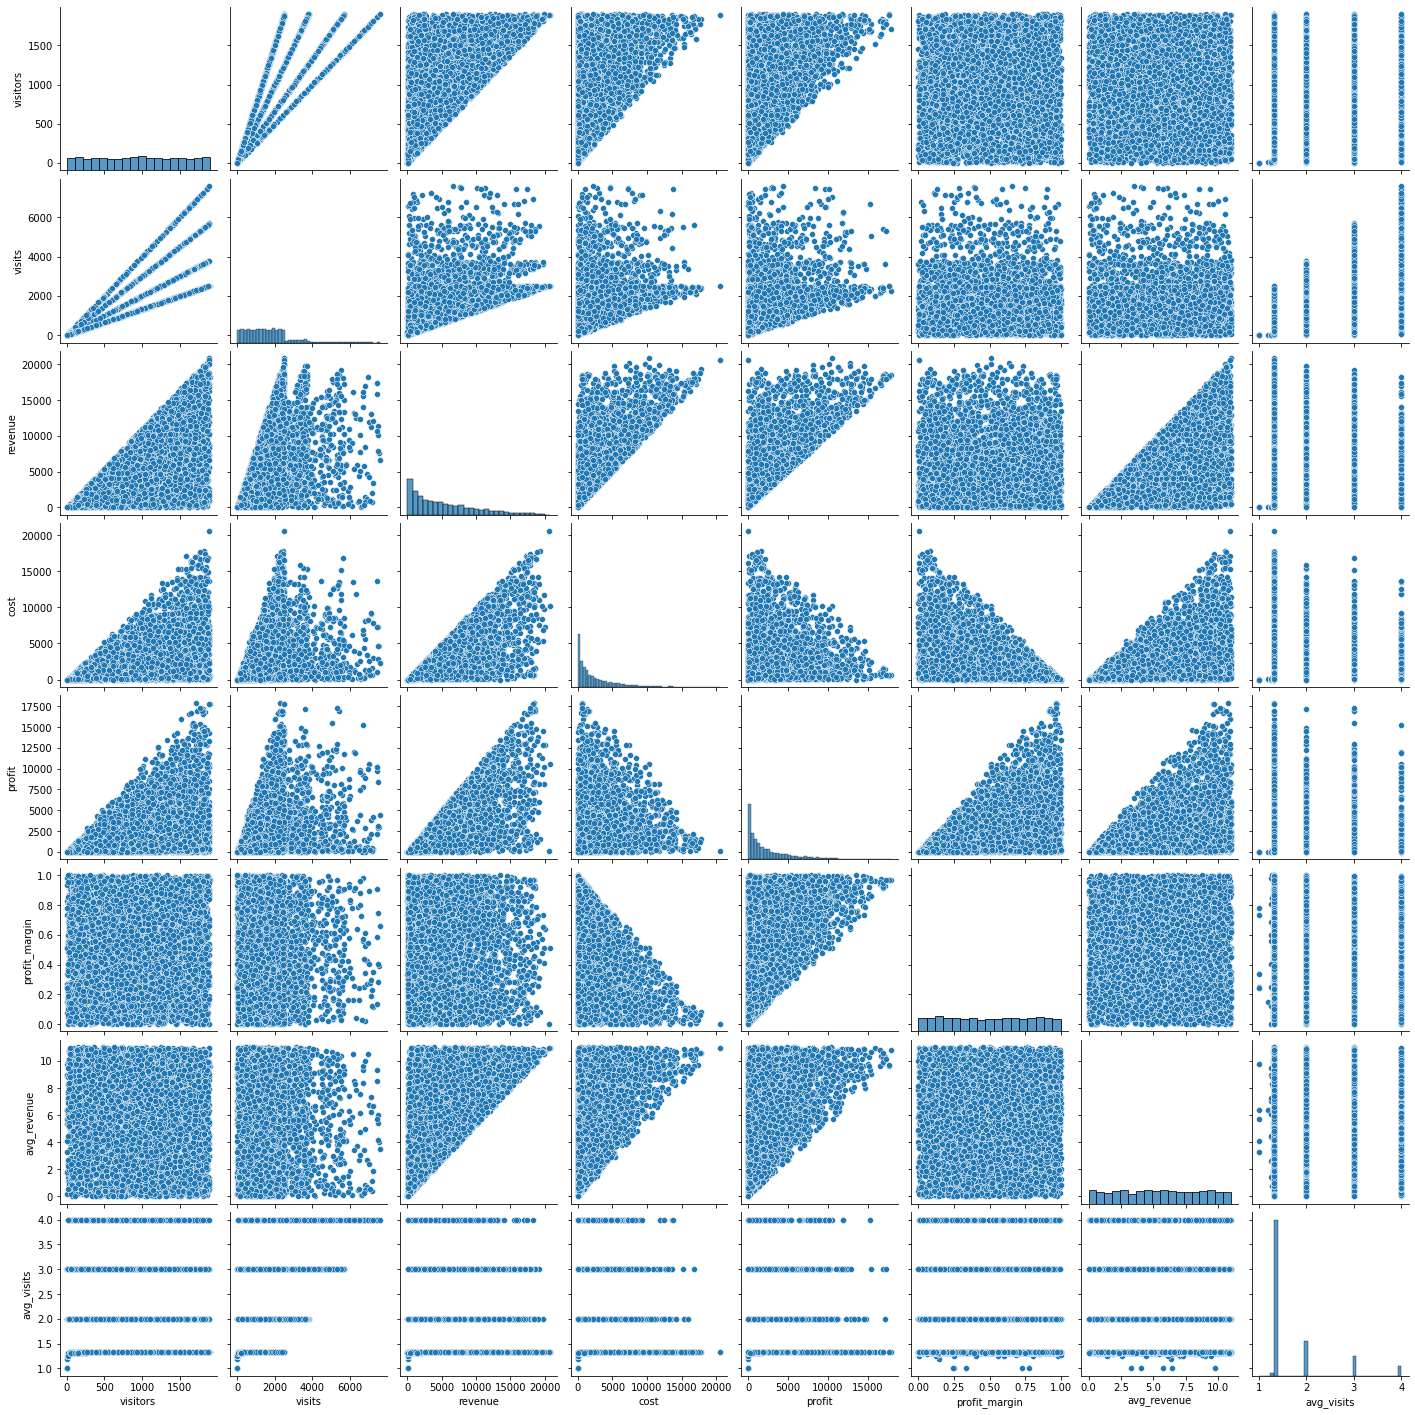

In [12]:
# quick observation of relations by pairs across all stats/metrics
pair = sns.pairplot(data=df)